In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# 1. Generate a sample dataset
np.random.seed(42)
# Create a dataset with 2 features and 100 samples
X = np.random.rand(100, 2) * 10
X[:, 1] = 3 * X[:, 0] + np.random.randn(100) * 2  # Add correlation

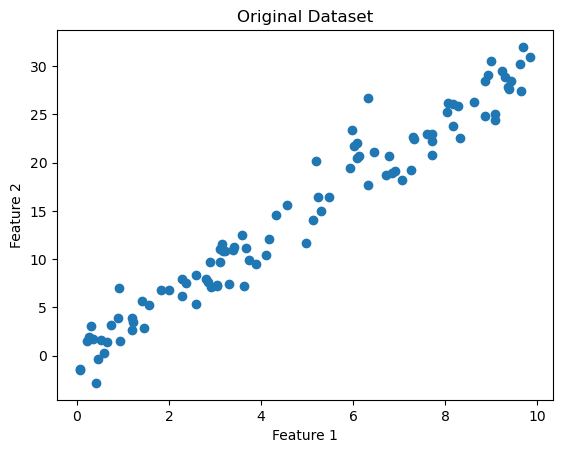

In [4]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# 2. Step-by-step PCA Implementation

# Step 1: Standardize the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select top-k eigenvectors (dimensionality reduction)
k = 1  # Reduce to 1 dimension
top_eigenvectors = eigenvectors[:, :k]

# Step 6: Project the data onto the top-k eigenvectors
X_pca = np.dot(X_centered, top_eigenvectors)

In [6]:
# 3. Visualize the result
# Reconstruct the data using the reduced representation
X_reconstructed = np.dot(X_pca, top_eigenvectors.T) + X_mean

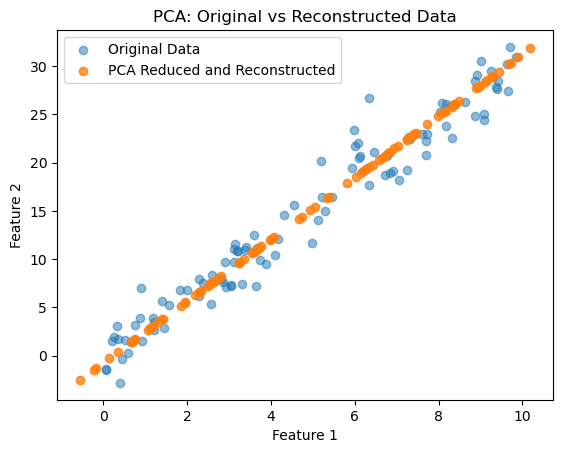

In [7]:
# Plot original data and PCA-reconstructed data
plt.scatter(X[:, 0], X[:, 1], label="Original Data", alpha=0.5)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], label="PCA Reduced and Reconstructed", alpha=0.8)
plt.legend()
plt.title("PCA: Original vs Reconstructed Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()